In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [145]:
customer_data = pd.read_excel('data1.xlsx')

In [146]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


> ### shape of the dataset

In [147]:
customer_data.shape

(541909, 8)

> ### check for duplicates 

In [148]:
customer_data[customer_data.duplicated(subset = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


> ### remove duplicates

In [149]:
customer_data.drop_duplicates(subset = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], inplace = True)

In [150]:
#check for duplicated values
customer_data[customer_data.duplicated(subset = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [151]:
# check for null values
np.sum(customer_data.isnull())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [152]:
null_values = customer_data[customer_data.isna().any(axis=1)]
null_values.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [153]:
#check datatypes of all culumns
customer_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

> From the above. we can easily distingush the categorical and numerical dataset. But we need to convert the CustomerID to string 

In [154]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

In [155]:
#descriptive statistics for numerical data
customer_data.select_dtypes(include=['float64', 'int64']).describe()

,Quantity,UnitPrice
count,536641.000000,536641.000000
mean,9.620029,4.632656
std,219.130156,97.233118
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


> ### From the description above, It was dscovered that min value for both Quantity and UnitPrice is negative. 
> ### This is a faulty variable as quantity cannot be negative and neither can Unit price of item(s). 
> ### Therefore we deal with the incorrect values 

In [156]:
#display all unique values in the quantity and unitprce to check if negative values exist
customer_data['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [157]:
#count values below 0
np.sum(customer_data['Quantity'] < 0)

10587

In [158]:
#count values of quality
np.sum(customer_data['Quantity'])

5162502

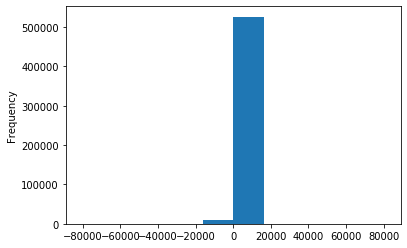

In [159]:
customer_data['Quantity'].plot(kind = 'hist')

> ### from the above, the negative data is not much compared to the positive values, so it is safe to drop the rows with negative values for Quantity

In [160]:
#get indices for all values lower than 0
my_idx1 = customer_data.loc[customer_data['Quantity'] < 0].index

In [161]:
#drop values wth quantity less than zero
customer_data.drop(index=my_idx, inplace=True)

In [162]:
customer_data.shape

(526054, 8)

> ### let's do the same for UnitPrice

In [165]:
#display all unique values in the quantity and unitprce to check if negative values exist
customer_data['UnitPrice'].unique()

array([   2.55,    3.39,    2.75, ...,    4.76,  933.17, 1714.17])

In [166]:
#count values below 0
np.sum(customer_data['UnitPrice'] < 0)

2

In [167]:
#count values above 0
np.sum(customer_data['UnitPrice']>0)

524878

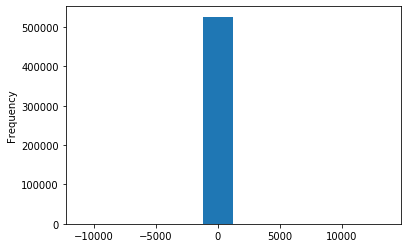

In [168]:
customer_data['UnitPrice'].plot(kind = 'hist')

> ### from the above, the negative data is not much compared to the positive values, so it is safe to drop the rows with negative values for Quantity

In [170]:
#get indices for all values lower than 0
my_idx3 = customer_data.loc[customer_data['UnitPrice'] < 0].index

In [172]:
#drop values wth quantity less than zero
customer_data.drop(index=my_idx3, inplace=True)

In [173]:
customer_data.shape

(526052, 8)

In [174]:
#check updated dataset
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### EXPLORATORY DATA ANALYSIS

In [195]:
customer_data1 = customer_data.copy()

In [196]:
#numerical data
numerical_data = customer_data1.select_dtypes(include=['float64', 'int64'])
numerical_data.head()

,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39


In [197]:
#categorical data
categorical_data = customer_data1.select_dtypes(include = 'object')
categorical_data.head()

,InvoiceNo,StockCode,Description,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom


In [198]:
customer_data1.Country.nunique()

38

In [199]:
customer_data1.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

> ### Number of transactions per country

In [204]:
customer_data['Country'].value_counts()

United Kingdom          481141
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

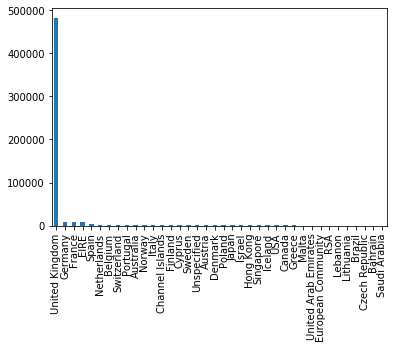

In [190]:
categorical_data['Country'].value_counts().plot(kind = 'bar')

> ### Number of customers per country using CustomerID

In [215]:
categorical_data.groupby(['CustomerID','Country']).size().reset_index().groupby('Country')[[0]].count()

,0
Country,
Australia,9
Austria,11
Bahrain,3
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1
